In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('data/internal_external.png', 0)

In [3]:
img.shape

(652, 1080)

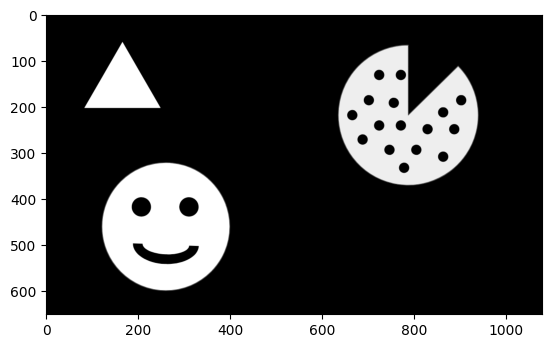

In [4]:
plt.imshow(img, cmap="gray")

In [20]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
# Extract coordinates of white regions
white_regions_coordinates = []
for contour in contours:
    coordinates = contour.squeeze().astype(float).tolist()
    white_regions_coordinates.append(coordinates)

In [22]:
cordnt_list = []
# Print the coordinates of each white region
for i, region in enumerate(white_regions_coordinates):
    if type(region[0]) is list:
        if len(region) > 2:
            # Calculate the area of the contour
            area = cv2.contourArea(np.around(np.array([[pnt] for pnt in region])).astype(np.int32))
            if area > 100:
                # Convert coordinates to the required format
                crdnts = [{'x': i[0], 'y': i[1]} for i in region]
                cordnt_list.append(crdnts)

In [23]:
# Get the height and width of the image
height, width = img.shape[:2]

In [24]:
# Create a black image with the same dimensions as the input
black_image = np.zeros((height, width, 3), dtype=np.uint8)

In [26]:
# Draw polygons on the black image
for cordnt in cordnt_list:
    ply_list = [[pnt['x'], pnt['y']] for pnt in cordnt]

    # Define the vertices of the polygon
    vertices = np.array(ply_list, dtype=np.int32)

    # Draw the polygon on the black image
    cv2.polylines(black_image, [vertices], isClosed=True, color=(0, 255, 0), thickness=2)

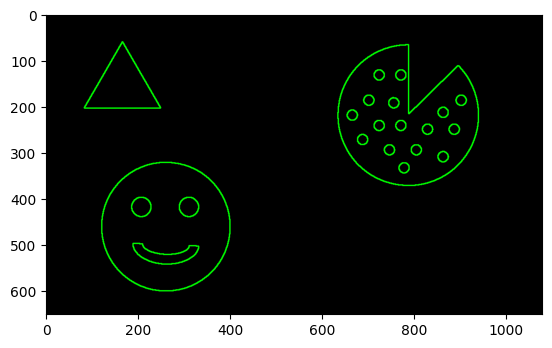

In [27]:
plt.imshow(black_image)